In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Experiment import Experiment
from algorithms import Greedy, SoftmaxPolicy, UCB, ThompsonSampling, Reinforce, UCB1_Normal
from utils import create_inverse_schedule
from metrics import MeanCummulativeRegret, PercentOptimalArmPull, AverageRegretOverTime
from reward_distributions import Normal

In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-d

# Bernoulli Reward Distribution
## Number of Arms K=2

#### Greedy Algorithm

In [9]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Greedy", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [08:43<00:00,  1.91it/s]


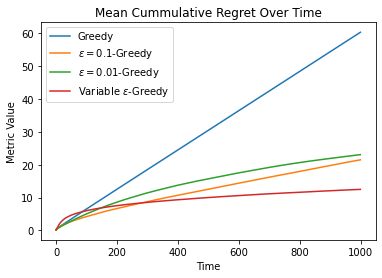

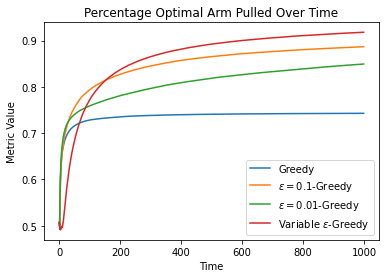

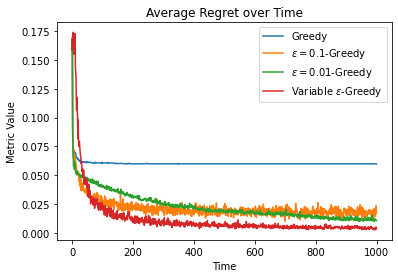

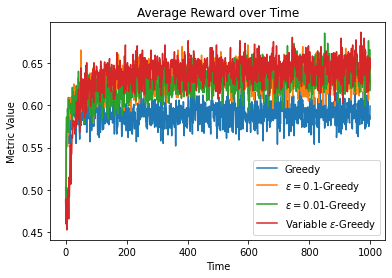

In [11]:
experiment.generate_plots()

#### Softmax Policy

In [5]:
algo = {r"Softmax with $\tau=0.01$": (SoftmaxPolicy, {"temp": 0.01}),
        r"Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
       r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Softmax", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [6]:
experiment.simulate()

100%|██████████| 1000/1000 [08:19<00:00,  2.00it/s]


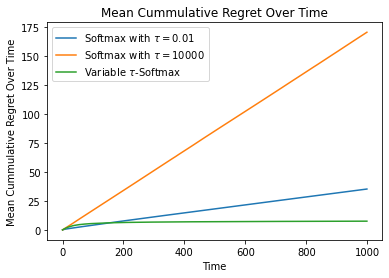

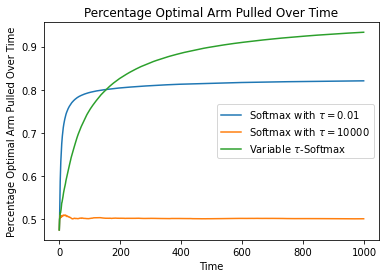

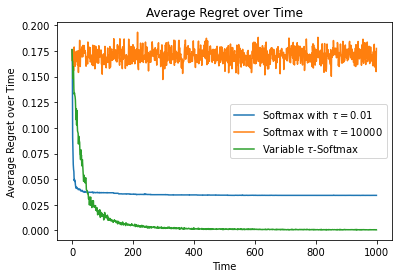

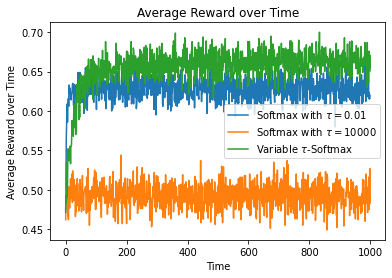

In [7]:
experiment.generate_plots()

In [8]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Softmax with $\tau=0.01$ 35.41298906239709
Softmax with $\tau=10000$ 170.54714716068654
Variable $\tau$-Softmax 7.719011895882566


#### UCB Algorithm

In [9]:
algo = {"UCB with $C=1$": (UCB, {"C": 1}),
        "UCB with $C=100$": (UCB, {"C": 100}),
       "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_UCB", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [05:57<00:00,  2.80it/s]


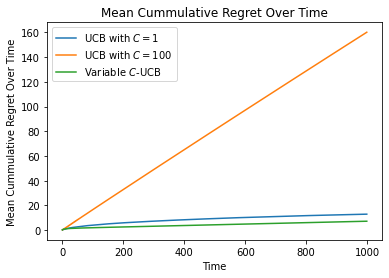

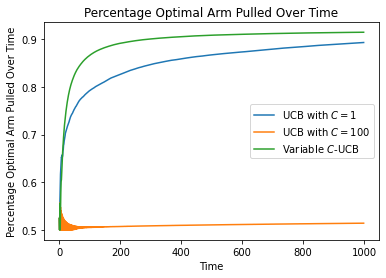

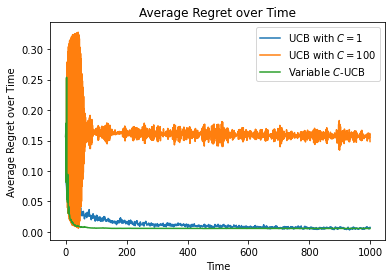

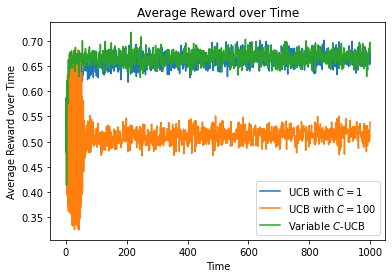

In [11]:
experiment.generate_plots()

In [12]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

UCB with $C=1$ 12.906514921000102
UCB with $C=100$ 160.1716278698234
Variable $C$-UCB 7.196657102353073


#### Thompson Sampling

In [13]:
algo = {"Thompson Sampling": (ThompsonSampling, {})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Thompson_Sampling", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [14]:
experiment.simulate()

100%|██████████| 1000/1000 [00:49<00:00, 20.28it/s]


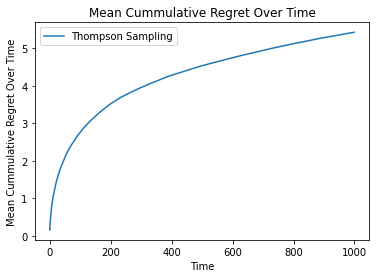

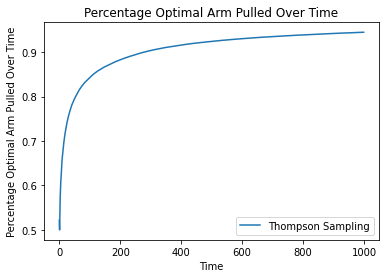

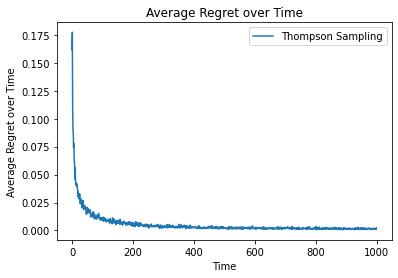

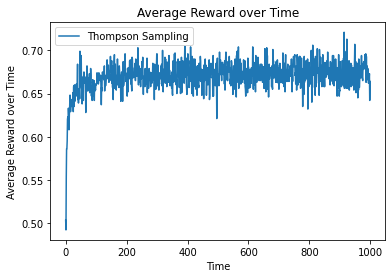

In [15]:
experiment.generate_plots()

In [16]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Thompson Sampling 5.43295921112031


#### Reinforce Algorithm

In [17]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(
    algo, 
    "Bernoulli_2_Reinforce", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [18]:
experiment.simulate()

100%|██████████| 1000/1000 [07:35<00:00,  2.20it/s]


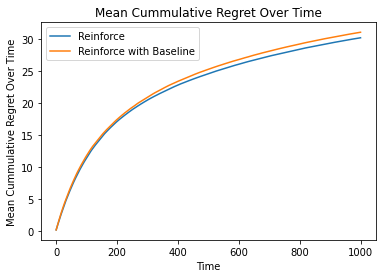

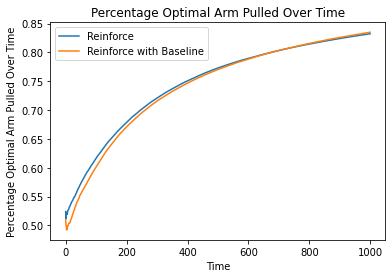

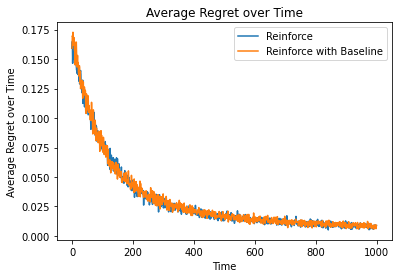

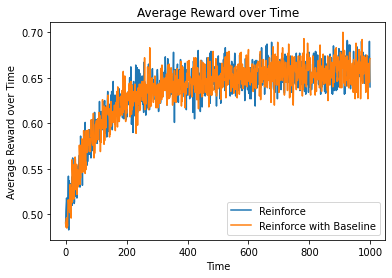

In [19]:
experiment.generate_plots()

In [20]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Reinforce 30.191133922185664
Reinforce with Baseline 31.056239448639968


#### Comparison of all algorithms

In [21]:
algo = {
    "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(10)}),
    r"Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(10)}),
    "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)}),
    "Thompson Sampling": (ThompsonSampling, {}),
    "Reinforce": (Reinforce, {"lr": 0.1})
}

experiment = Experiment(
    algo, 
    "Bernoulli_2_All", 
    num_runs=1000, 
    num_arms=2, 
    metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()]
)

In [22]:
experiment.simulate()

100%|██████████| 1000/1000 [10:44<00:00,  1.55it/s]


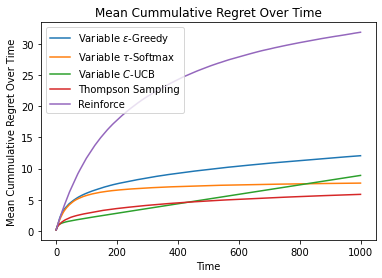

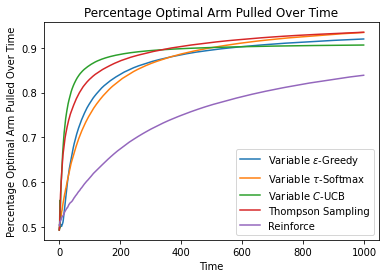

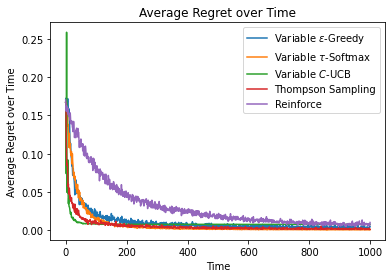

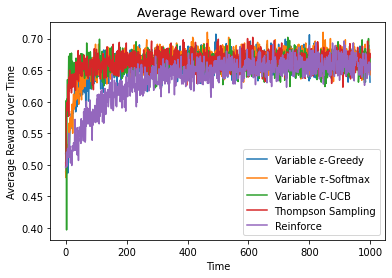

In [23]:
experiment.generate_plots()

In [24]:
for algo_name in algo:
    print(algo_name, experiment.results[algo_name]["metrics"]['Mean Cummulative Regret Over Time'][-1])

Variable $\epsilon$-Greedy 12.071821759012211
Variable $\tau$-Softmax 7.677002699622296
Variable $C$-UCB 8.910288710274347
Thompson Sampling 5.872393446230802
Reinforce 31.88120347725706


In [2]:
experiment = Experiment()
experiment.simulate()

0.7975412414931331
0.1651884169327248
----------
0.1
0.05
0.03333333333333333
0.025
0.02
0.016666666666666666
0.014285714285714287
0.0125
0.011111111111111112
0.01
0.009090909090909092
0.008333333333333333
0.007692307692307693
0.0071428571428571435
0.006666666666666667
0.00625
0.0058823529411764705
0.005555555555555556
0.005263157894736842
0.005
0.004761904761904762
0.004545454545454546
0.004347826086956522
0.004166666666666667
0.004
0.0038461538461538464
0.003703703703703704
0.0035714285714285718
0.003448275862068966
0.0033333333333333335
0.0032258064516129032
0.003125
0.0030303030303030303
0.0029411764705882353
0.002857142857142857
0.002777777777777778
0.002702702702702703
0.002631578947368421
0.002564102564102564
0.0025
0.0024390243902439024
0.002380952380952381
0.002325581395348837
0.002272727272727273
0.0022222222222222222
0.002173913043478261
0.002127659574468085
0.0020833333333333333
0.0020408163265306124
0.002
0.00196078431372549
0.0019230769230769232
0.0018867924528301887
0.00

In [7]:
mean_regret

array([0.91885076, 0.91885076, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073583,
       1.01073583, 1.01073583, 1.01073583, 1.01073583, 1.01073

In [3]:
cum_sum = np.cumsum(experiment.regrets, axis=1)
mean_regret = np.mean(cum_sum, axis=0)

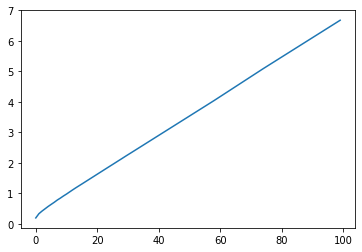

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

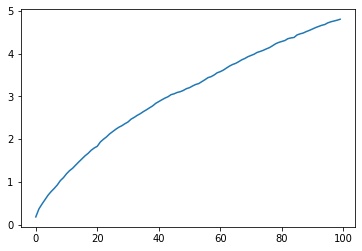

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

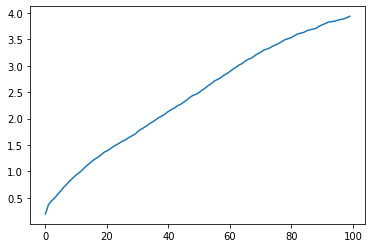

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

In [3]:
cum_sum = np.cumsum(experiment.regrets, axis=1)
mean_regret = np.mean(cum_sum, axis=0)

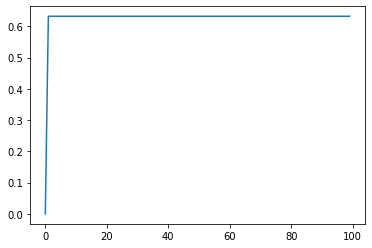

In [4]:
plt.figure()
plt.plot(mean_regret)
plt.show()

In [5]:
experiment.algo.get_config()

0.1


In [4]:
algo = {"Greedy": (Greedy, {})}

experiment = Experiment(algo, "Greedy", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [5]:
experiment.simulate()

100%|██████████| 100/100 [00:03<00:00, 29.34it/s]


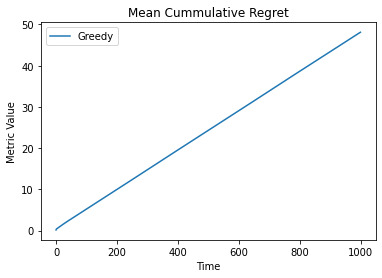

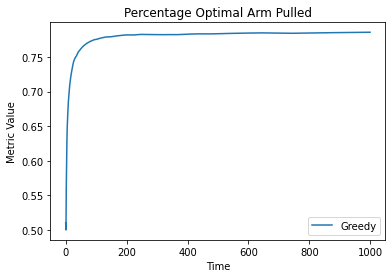

In [6]:
experiment.generate_plots()

In [13]:
algo = {"Greedy": (Greedy, {}),
       "$\epsilon=0.1$-Greedy": (Greedy, {"eps": 0.1}),
       "$\epsilon=0.01$-Greedy": (Greedy, {"eps": 0.01}),
       "Variable $\epsilon$-Greedy": (Greedy, {"eps_schedule": create_inverse_schedule(0.01)})}

experiment = Experiment(algo, "Greedy", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [14]:
experiment.simulate()

100%|██████████| 100/100 [00:14<00:00,  7.05it/s]


In [15]:
experiment.results["$\epsilon=0.1$-Greedy"]

{'regrets': array([[0.57617419, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.15635551, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.21220431, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.3299584 , 0.        , 0.3299584 , ..., 0.        , 0.        ,
         0.        ],
        [0.10203165, 0.        , 0.10203165, ..., 0.        , 0.        ,
         0.        ],
        [0.83560376, 0.        , 0.83560376, ..., 0.        , 0.83560376,
         0.        ]]),
 'counts': array([[ 46., 954.],
        [ 59., 941.],
        [944.,  56.],
        [944.,  56.],
        [952.,  48.],
        [944.,  56.],
        [949.,  51.],
        [ 65., 935.],
        [963.,  37.],
        [955.,  45.],
        [ 48., 952.],
        [ 77., 923.],
        [947.,  53.],
        [ 58., 942.],
        [944.,  56.],
        [956.,  44.],
        [938.,  62.],
        [ 65.,

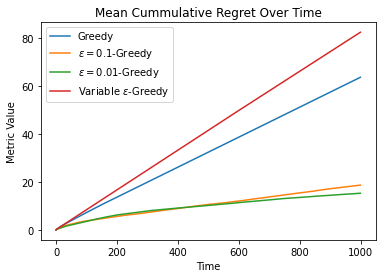

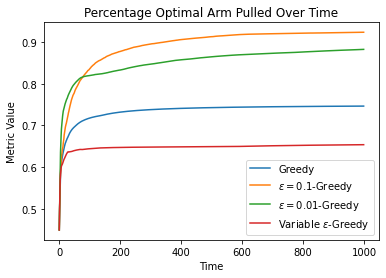

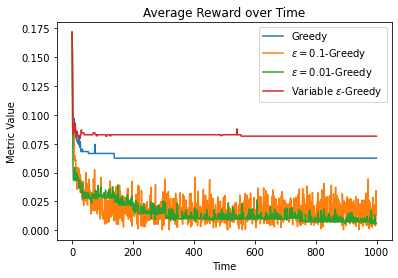

In [7]:
experiment.generate_plots()

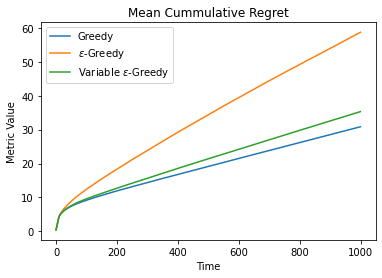

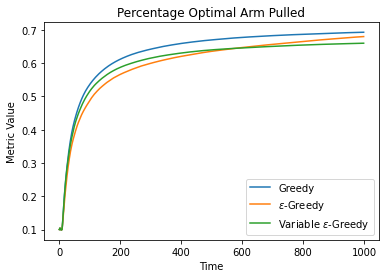

In [7]:
experiment.generate_plots()

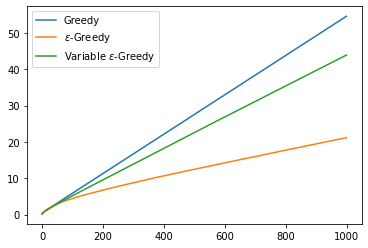

In [7]:
experiment.generate_plots()

In [8]:
MeanCummulativeRegret().__class__.__name__

'MeanCummulativeRegret'

AttributeError: 'Experiment' object has no attribute 'exp_dir'

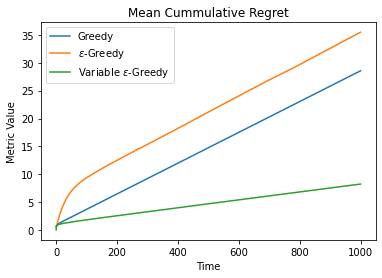

In [4]:
experiment.generate_plots()

AttributeError: 'Experiment' object has no attribute 'exp_dir'

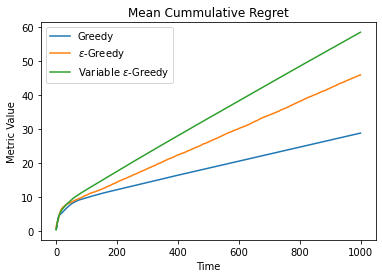

In [5]:
experiment.generate_plots()

In [25]:
algo = {"Softmax with $\tau=0.1$": (SoftmaxPolicy, {"temp": 0.1}),
        "Softmax with $\tau=10000$": (SoftmaxPolicy, {"temp": 10000}),
        "Softmax with $\tau=1$": (SoftmaxPolicy, {"temp": 1}),
       "Variable $\tau$-Softmax": (SoftmaxPolicy, {"temp_schedule": create_inverse_schedule(1000)})}

experiment = Experiment(algo, "Softmax Policy", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [26]:
experiment.simulate()

100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


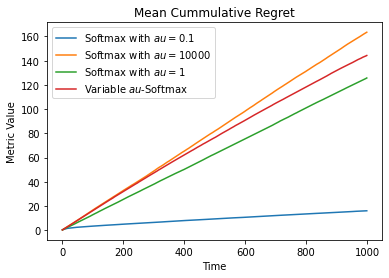

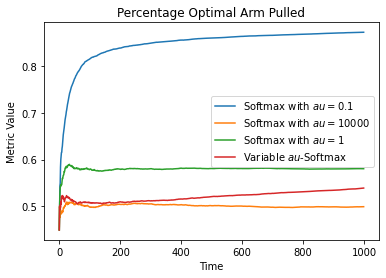

In [27]:
experiment.generate_plots()

$\tau=0.1$

In [9]:
algo = {"UCB with $C=1$": (UCB, {"C": 1}),
#         "UCB with $C=100$": (UCB, {"C": 100}),
       "Variable $C$-UCB": (UCB, {"C_schedule": create_inverse_schedule(10)})}

experiment = Experiment(algo, "UCB Policy", num_runs=1000, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()])

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [00:54<00:00, 18.31it/s]


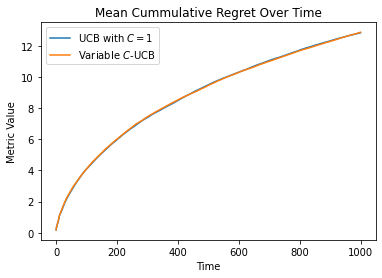

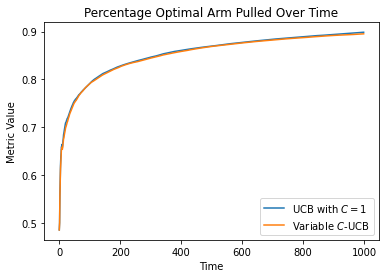

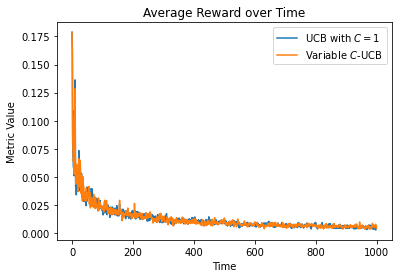

In [11]:
experiment.generate_plots()

In [14]:
algo = {"Thompson Sampling": (ThompsonSampling, {})}

experiment = Experiment(algo, "Thompson Sampling", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [15]:
experiment.simulate()

100%|██████████| 100/100 [00:06<00:00, 15.94it/s]


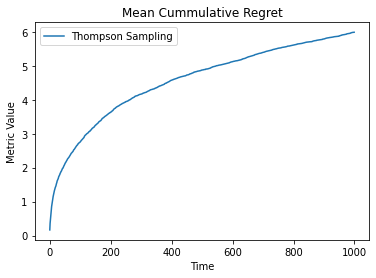

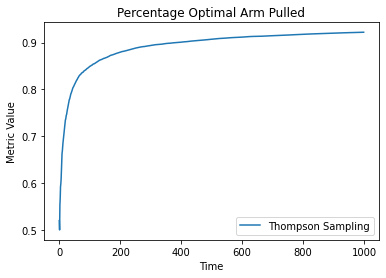

In [16]:
experiment.generate_plots()

In [9]:
algo = {"Reinforce": (Reinforce, {"lr": 0.1}),
        "Reinforce with Baseline": (Reinforce, {"use_baseline": True, "lr": 0.1})}

experiment = Experiment(algo, "Reinforce", num_runs=1000, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull()])

In [10]:
experiment.simulate()

100%|██████████| 1000/1000 [02:01<00:00,  8.25it/s]


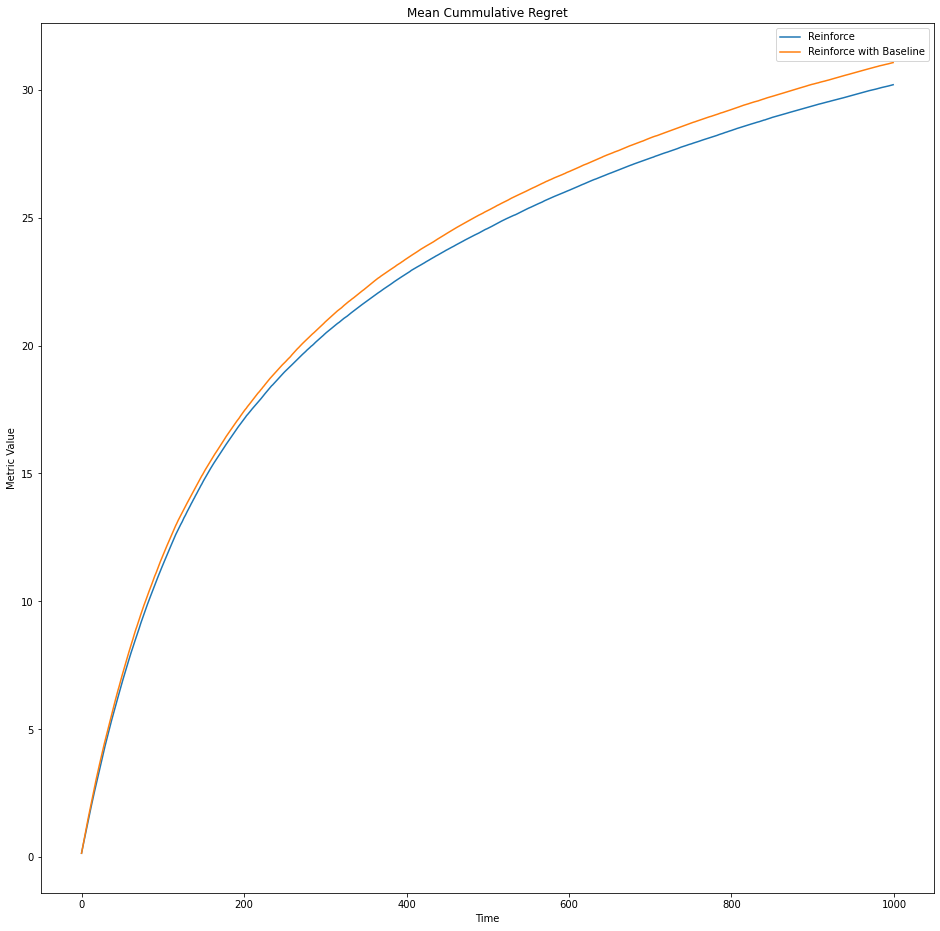

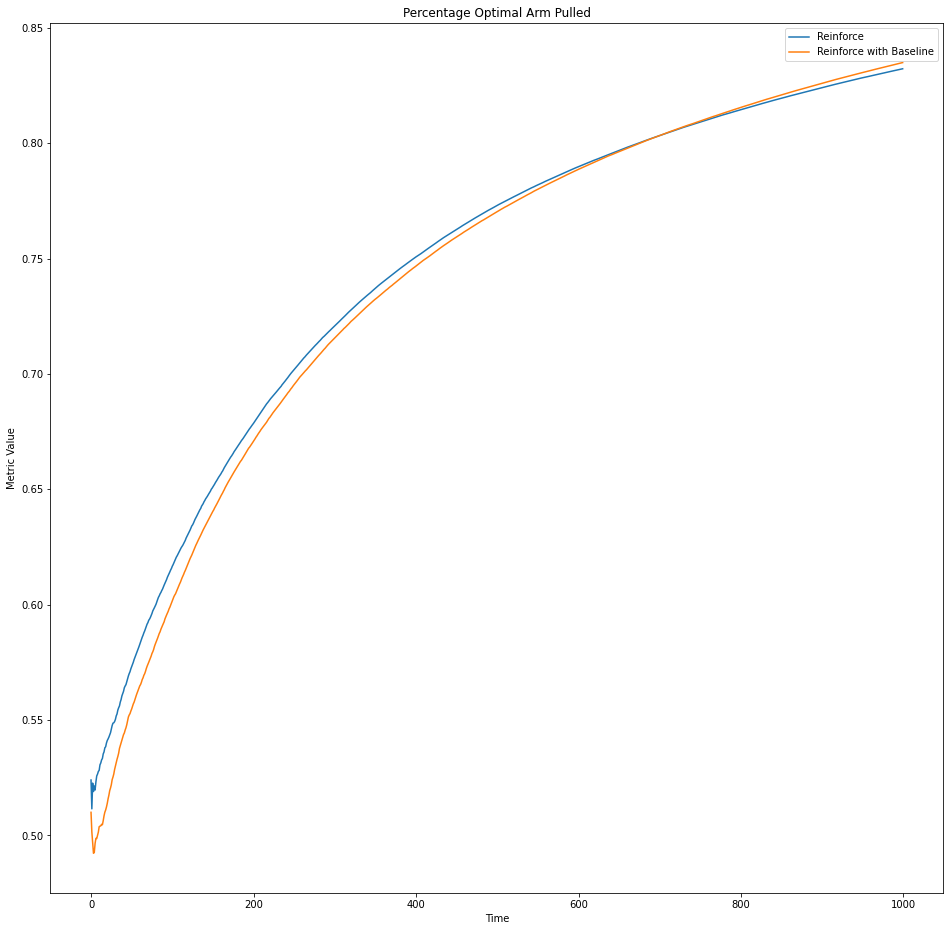

In [11]:
experiment.generate_plots()

In [2]:
p = PercentOptimalArmPull()
arr1 = np.array([[1.2, 0, 0, 1, 0],
                [3, 4, 0, 0, 0.8]])
p(arr1)

array([0.  , 0.25, 0.5 , 0.5 , 0.5 ])

In [5]:
algo = {"UCB with $C=1$": (UCB1_Normal, {"C": 1}),
#         "UCB with $C=100$": (UCB, {"C": 100}),
       "Variable $C$-UCB": (UCB1_Normal, {"C_schedule": create_inverse_schedule(10000)})}

experiment = Experiment(algo, "UCB1-Normal Policy", num_runs=100, num_arms=2, metrics=[MeanCummulativeRegret(), PercentOptimalArmPull(), AverageRegretOverTime()], reward_dist=Normal)

In [6]:
experiment.simulate()

  1%|          | 1/100 [00:00<00:12,  8.20it/s]

0.1
0.1
0.1
0.1


  3%|▎         | 3/100 [00:00<00:10,  9.07it/s]

0.1
0.1
0.1
0.1
0.1
0.1


  7%|▋         | 7/100 [00:00<00:08, 10.64it/s]

0.1
0.1
0.1
0.1
0.1
0.1


  9%|▉         | 9/100 [00:00<00:08, 10.38it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 13%|█▎        | 13/100 [00:01<00:08, 10.84it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 15%|█▌        | 15/100 [00:01<00:07, 10.90it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 19%|█▉        | 19/100 [00:01<00:07, 10.75it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 21%|██        | 21/100 [00:01<00:07, 10.89it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 25%|██▌       | 25/100 [00:02<00:06, 11.26it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 27%|██▋       | 27/100 [00:02<00:06, 11.43it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 31%|███       | 31/100 [00:02<00:06, 11.27it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 33%|███▎      | 33/100 [00:03<00:05, 11.28it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 37%|███▋      | 37/100 [00:03<00:05, 11.10it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 39%|███▉      | 39/100 [00:03<00:05, 11.04it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 43%|████▎     | 43/100 [00:03<00:05, 11.02it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 45%|████▌     | 45/100 [00:04<00:04, 11.14it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 49%|████▉     | 49/100 [00:04<00:04, 11.30it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 51%|█████     | 51/100 [00:04<00:04, 11.33it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 55%|█████▌    | 55/100 [00:04<00:03, 11.39it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 57%|█████▋    | 57/100 [00:05<00:03, 11.19it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 61%|██████    | 61/100 [00:05<00:03, 11.14it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 63%|██████▎   | 63/100 [00:05<00:03, 11.18it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 67%|██████▋   | 67/100 [00:06<00:03, 10.92it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 69%|██████▉   | 69/100 [00:06<00:02, 11.08it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 73%|███████▎  | 73/100 [00:06<00:02, 11.31it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 75%|███████▌  | 75/100 [00:06<00:02, 11.30it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 79%|███████▉  | 79/100 [00:07<00:01, 11.20it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 81%|████████  | 81/100 [00:07<00:01, 10.95it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 85%|████████▌ | 85/100 [00:07<00:01, 11.24it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 87%|████████▋ | 87/100 [00:07<00:01, 11.22it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 91%|█████████ | 91/100 [00:08<00:00, 11.29it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 93%|█████████▎| 93/100 [00:08<00:00, 11.41it/s]

0.1
0.1
0.1
0.1
0.1
0.1


 97%|█████████▋| 97/100 [00:08<00:00, 11.54it/s]

0.1
0.1
0.1
0.1
0.1
0.1


100%|██████████| 100/100 [00:08<00:00, 11.13it/s]

0.1
0.1
0.1
0.1


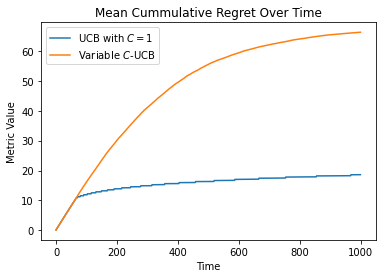

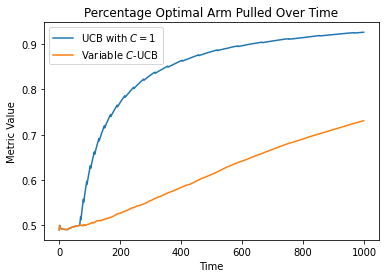

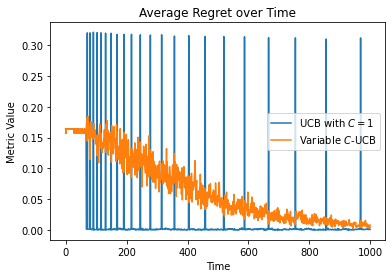

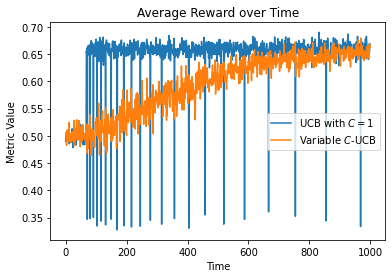

In [7]:
experiment.generate_plots()

In [11]:
np.argmax(np.array(experiment.results['UCB with $C=1$']['metrics']['Average Regret over Time'])  == 0.22114850509451972)

71

In [8]:
experiment.results['UCB with $C=1$']

{'regrets': array([[0.57617419, 0.        , 0.57617419, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.23782244, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.37757646, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.56439556, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.46498411, 0.        , 0.46498411, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.09814592, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 'counts': array([[ 56., 944.],
        [944.,  56.],
        [944.,  56.],
        [ 56., 944.],
        [944.,  56.],
        [352., 648.],
        [944.,  56.],
        [944.,  56.],
        [904.,  96.],
        [ 56., 944.],
        [859., 141.],
        [944.,  56.],
        [ 56., 944.],
        [944.,  56.],
        [128., 872.],
        [ 64., 936.],
        [ 56., 944.],
        [944.,

In [7]:
type(Normal())()

0.1
0.1
